<a href="https://colab.research.google.com/github/MatiasHolmemoMardal/FastMONAI/blob/main/colon_b_s_semantic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary semantic segmentation colon

In [1]:
%pip install fastmonai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━

In [2]:
from fastMONAI.vision_all import *

from monai.apps import DecathlonDataset
from sklearn.model_selection import train_test_split

### Download external data


We use the MONAI function `DecathlonDataset` to download the data and generate items for training. 

set path

In [3]:
path = Path('../data')
path.mkdir(exist_ok=True)


Download the heart dataset

In [4]:
training_data = DecathlonDataset(root_dir=path, task="Task10_Colon", section="training", 
    download=True, cache_num=0, num_workers=2)

Task10_Colon.tar: 5.81GB [04:41, 22.2MB/s]                            

2023-04-21 09:47:17,231 - INFO - Downloaded: ../data/Task10_Colon.tar


2023-04-21 09:47:28,371 - INFO - Verified 'Task10_Colon.tar', md5: bad7a188931dc2f6acf72b08eb6202d0.
2023-04-21 09:47:28,372 - INFO - Writing into directory: ../data.


Put dataset into a dataframe and print the shape

In [5]:
df = pd.DataFrame(training_data.data)
df.shape

(101, 2)

Split the labled data into training and test

In [6]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df.shape, test_df.shape

((90, 2), (11, 2))

### Examine the training data

Each class label will be counted for the masks (including the background) if you pass in the mask path and define the `dtype` to be `MedMask` in `MedDataset`

Create a MedDataset instance and preprocess the data, also summarizing the dataset information.

In [7]:
med_dataset = MedDataset(img_list=train_df.label.tolist(), dtype=MedMask, max_workers=6)

In [8]:
med_dataset.df.head()

,path,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,voxel_count_0,voxel_count_1
0,../data/Task10_Colon/labelsTr/colon_207.nii.gz,512,512,84,0.7793,0.7793,5.0,RAS+,21994851,25245
1,../data/Task10_Colon/labelsTr/colon_036.nii.gz,512,512,97,0.7031,0.7031,5.0,RAS+,25424306,3662
2,../data/Task10_Colon/labelsTr/colon_026.nii.gz,512,512,82,0.7031,0.7031,5.0,RAS+,21489127,6681
3,../data/Task10_Colon/labelsTr/colon_172.nii.gz,512,512,81,0.8184,0.8184,5.0,RAS+,21222104,11560
4,../data/Task10_Colon/labelsTr/colon_142.nii.gz,512,512,102,0.7031,0.7031,5.0,RAS+,26725388,13300


In [9]:
data_info_df = med_dataset.summary()

In [10]:
data_info_df.head()

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
56,512,512,100,0.7812,0.7812,5.0,RAS+,../data/Task10_Colon/labelsTr/colon_072.nii.gz,2
39,512,512,93,0.7812,0.7812,5.0,RAS+,../data/Task10_Colon/labelsTr/colon_106.nii.gz,2
0,512,512,37,0.7890,0.7890,5.0,RAS+,../data/Task10_Colon/labelsTr/colon_064.nii.gz,1
64,512,512,110,0.7148,0.7148,4.0,RAS+,../data/Task10_Colon/labelsTr/colon_098.nii.gz,1
63,512,512,107,0.7051,0.7051,3.0,RAS+,../data/Task10_Colon/labelsTr/colon_069.nii.gz,1


In [11]:
resample, reorder = med_dataset.suggestion()
resample, reorder

([0.7031, 0.7031, 5.0], False)

In [12]:
bs=2

In [13]:
img_size = med_dataset.get_largest_img_size(resample=resample)
img_size

[711.0, 711.0, 130.0]

Define data augmentation and preprocessing transformations.

In [14]:
size = [160,160,128]

In [15]:
item_tfms = [ZNormalization(), PadOrCrop(size), RandomAffine(scales=0, degrees=5)]  # RandomMotion()

Create a MedDataBlock instance and dataloaders for the training and validation sets.

In [16]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), MedMaskBlock), 
                      splitter=RandomSplitter(valid_pct=0.1, seed=42), # By passing valid_pct=0.1, we tell it to get a random 10% of the training set for validation.
                      get_x=ColReader('image'),
                      get_y=ColReader('label'),
                      item_tfms=item_tfms,
                      reorder=reorder,
                      resample=resample) 

In [17]:
dls = dblock.dataloaders(train_df, bs=bs)

In [18]:
# training and validation
len(dls.train_ds.items), len(dls.valid_ds.items)

(81, 9)

Visualize a batch of data.

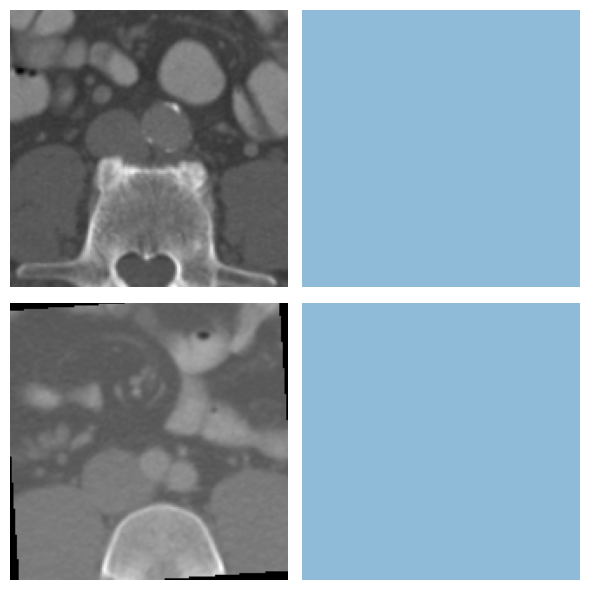

In [19]:
dls.show_batch(anatomical_plane=2) 

### Create and train a 3D model

Define a 3D U-Net model with specific architecture parameters.

In [20]:
from monai.networks.nets import UNet
from monai.losses import DiceLoss

In [21]:
model = UNet(spatial_dims=3, in_channels=1, out_channels=1, channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), num_res_units=2)
model = model.model

Define the DiceLoss as the loss function for training.

In [22]:
loss_func = CustomLoss(loss_func=DiceLoss(sigmoid=True))

In [23]:
!pip install monai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from monai.losses import FocalLoss

loss_func = FocalLoss()


Create a Learner object with the model, loss function, and optimizer (Ranger).

In [27]:
learn = Learner(dls, model, loss_func=loss_func, opt_func=ranger, metrics=binary_dice_score)

Perform learning rate finding to determine the optimal learning rate for training.

SuggestedLRs(valley=0.00363078061491251)

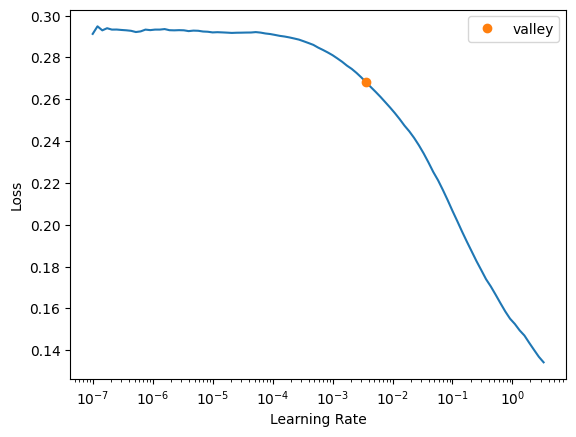

In [28]:
learn.lr_find()

Apply the learning rate to the learning pipeline

In [29]:
lr = 0.0036

In [ ]:
callbacks = EarlyStoppingCallback(monitor='valid_loss', patience=3)

Train the model with fit_flat_cos() with 200 epochs

In [30]:
learn.fit_flat_cos(10, lr)


epoch,train_loss,valid_loss,binary_dice_score,time
0,0.190925,0.143437,nan,05:01
1,0.132275,0.072408,nan,04:53
2,0.078504,0.028907,nan,04:56
3,0.043457,0.012209,nan,04:55
4,0.024306,0.007404,nan,05:02
5,0.014210,0.005382,nan,04:58
6,0.009328,0.004627,nan,05:02
7,0.006595,0.003974,nan,04:59
8,0.005206,0.003739,nan,05:03
9,0.004452,0.003675,nan,04:59


visual representation of the training progress of the deep learning model, plotting the loss over time

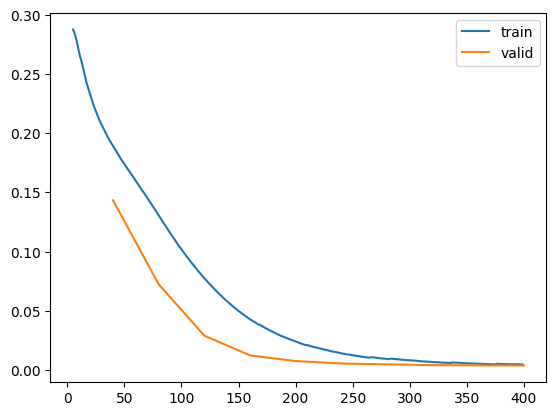

In [31]:
learn.recorder.plot_loss()

Save the model

In [32]:
learn.save('colon-model')

Path('models/colon-model.pth')

Show results with target and prediction

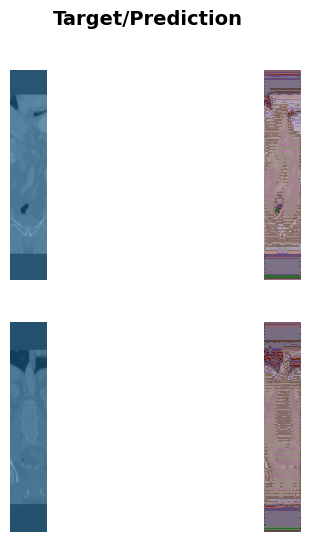

In [33]:
learn.show_results(anatomical_plane=1)

Export the model

In [39]:
if 'google.colab' in str(get_ipython()):
  temp_path = Path('/content/drive/MyDrive/DAT255/FastMONAI/models')
else:
  temp_path = Path(os.getcwd())
learn.path = temp_path

In [41]:
learn.export('fastmonai_model_colon.pkl')

### Test the model

In [34]:
test_dl = learn.dls.test_dl(test_df,with_labels=True)

Show batch with picture and mask

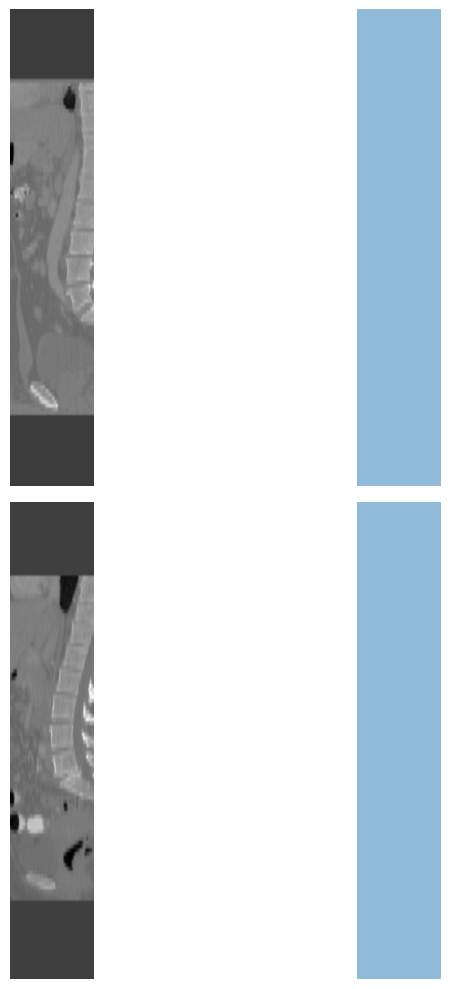

In [35]:
test_dl.show_batch(anatomical_plane=0, figsize=(10,10))

In [36]:
pred_acts, labels = learn.get_preds(dl=test_dl)
pred_acts.shape, labels.shape

(torch.Size([11, 1, 160, 160, 128]), torch.Size([11, 1, 160, 160, 128]))

Get the dice score

In [37]:
binary_dice_score(pred_acts, labels)

tensor(nan)

Show batch with target and prediction

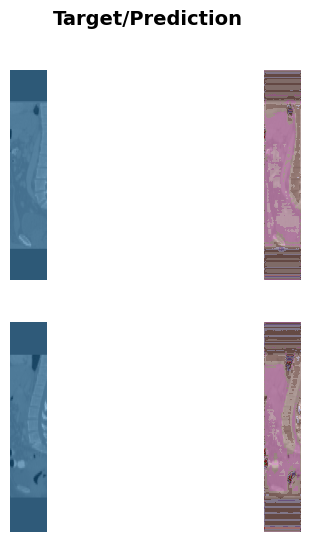

In [38]:
learn.show_results(anatomical_plane=0, dl=test_dl)